In [25]:

%matplotlib inline
import seaborn as sns
from numpy import array
import numpy as np
import scipy.stats.stats as stats
import scipy as scipy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
import statsmodels.api as sm

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
fit_data = pd.read_excel("Fortnite_ret.xlsx")
fit_data.head()

,Fortnite
0-0,0.00000
0-5,3.86068
0-10,-2.01856
0-15,-1.28691
0-20,2.36388


In [6]:
# To list form, last to newest
fit_list = list(fit_data[fit_data.columns[0]])
fit_list[:5]

[0.0, 3.86068, -2.01856, -1.28691, 2.36388]

In [154]:
#Defined equations for calculation
def sigma(x):
    xmean = np.mean(x)
    return np.sqrt(np.sum((x-xmean)**2)/(x.size))

def skewness(x):
    std = sigma(x)
    xmean = np.mean(x)
    return (np.sum((x-xmean)**3)/(std**3))/x.size

def kurtosis(x):
    #Unadjusted, not normalized to 3
    std = sigma(x)
    xmean = np.mean(x)
    return (np.sum((x-xmean)**4)/(std**4))/x.size-3

def ACF(x,k):
    xmean = np.mean(x)
    n = x.size
    ret = 0
    for i in range(0,n-k):
        ret = ret + (x[i]-xmean)*(x[i+k]-xmean)
    ret = ret / n
    return ret

In [155]:
print("Moments for Actual Data")
amom1 = np.mean(fit_list)
amom2 = ACF(array(fit_list),0)
amom3 = skewness(array(fit_list))
amom4 = kurtosis(array(fit_list))
sig = np.sqrt(amom2)
print("Expected Value: " + str(amom1))
print("Variance: " + str(amom2))
print("Skewness: " + str(amom3))
print("Kurtosis: " + str(amom4))

Moments for Actual Data
Expected Value: -0.02782017103909464
Variance: 25.838100438778355
Skewness: -3.3168059466824147
Kurtosis: 31.35494439402548


In [179]:
def AR(ar, y):
    ret = 0
    for term, term_num in zip(ar, range(1,len(ar)+1)):
        ret = ret + term * y[-term_num]
        
    return ret

def test_AR(ar, y):
    
    for term in ar:
        if np.sqrt(term**2) >= 1:
            return 1000000000
    
    lag = len(ar)
    err = [0] * lag
    ret = err
    
    for num in range(lag,len(y)):
        ret = ret + [AR(ar, y[num-lag:num])]
        err = err + [y[num]-ret[-1]]
    
    sse = sum([x**2 for x in err])
    
    return sse


def calc_AR(ar, y):
    
    lag = len(ar)
    err = [0] * lag
    ret = err
    
    for num in range(lag,len(y)):
        ret = ret + [AR(ar, y[num-lag:num])]
        err = err + [y[num]-ret[-1]]

    return ret, err
    

In [180]:
modelAR1 = scipy.optimize.minimize(test_AR,[0.2],(fit_list))
modelAR1_args = modelAR1.x
modelAR1_args

array([-0.04259959])

In [181]:
modelAR1_var = modelAR1.fun/len(fit_list)
modelAR1_var

25.79198451276313

In [182]:
modelAR2 = scipy.optimize.minimize(test_AR,[0.2, 0.2],(fit_list))
modelAR2_args = modelAR2.x
modelAR2_args

array([-0.04146605,  0.02663959])

In [183]:
modelAR2_var = modelAR2.fun/len(fit_list)
modelAR2_var

25.771768519919423

In [122]:
def MA(ma, err):
    ret = 0
    for term, term_num in zip(ma, range(1,len(ma)+1)):
        ret = ret + term * err[-term_num]
    return ret

def test_MA(ma, y):
    
    #Restricting large term values
    for term in ma:
        if np.sqrt(term**2) >= 10:
            return 1000000000
    
    lag = len(ma)
    err = [0] * lag
    ret = err
    
    for num in range(lag,len(y)):
        ret = ret + [MA(ma, err[num-lag:num])]
        err = err + [y[num]-ret[-1]]
    
    sse = sum([x**2 for x in err])
    
    return sse
    
def calc_MA(ma, y):
    
    lag = len(ma)
    err = [0] * lag
    ret = err
    
    for num in range(lag,len(y)):
        ret = ret + [MA(ma, err[num-lag:num])]
        err = err + [y[num]-ret[-1]]

    ret = ret[lag:] 
    err = err[lag:]
    
    return ret, err

In [49]:
modelMA1 = scipy.optimize.minimize(test_MA,[0.2],(fit_list))
modelMA1_args = modelMA1.x
modelMA1_args

array([-0.04007508])

In [50]:
modelMA1_var = modelMA1.fun/len(fit_list)
modelMA1_var

25.794651601898664

In [59]:
modelMA2 = scipy.optimize.minimize(test_MA,[0.2, 0.2],(fit_list))
modelMA2_args = modelMA2.x
modelMA2_args

C:\Users\Haiqiao Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\Haiqiao Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\Haiqiao Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Haiqiao Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\Haiqiao Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\Haiqiao Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in double_scalars


array([-0.05014436, -0.02529248])

In [60]:
modelMA2_var = modelMA2.fun/len(fit_list)
modelMA2_var

25.860845783941926

In [121]:
def ARMA(ar, ma, y, err):
    ret = 0
    for term, term_num in zip(ar, range(1,len(ar)+1)):
        ret = ret + term * y[-term_num]
    for term, term_num in zip(ma, range(1,len(ar)+1)):
        ret = ret + term * err[-term_num]
    return ret

#This test assumes that the we are using ARMA(n,n) where n is a positive integer
def test_ARMA(terms, y):
    ar = terms[: int(len(terms)/2)]
    ma = terms[int(len(terms)/2):len(terms)]
    
    for term in ar:
        if np.sqrt(term**2) >= 1:
            return 1000000000
    
    lag = len(ma)
    err = [0] * lag
    ret = err
    
    for num in range(lag,len(y)):
        ret = ret + [ARMA(ar, ma, y[num-lag:num], err[num-lag:num])]
        err = err + [y[num]-ret[-1]]
    
    sse = sum([x**2 for x in err])
    
    return sse
    
def calc_ARMA(terms, y):
    ar = terms[: int(len(terms)/2)]
    ma = terms[int(len(terms)/2):len(terms)]
    
    lag = len(ma)
    err = [0] * lag
    ret = err
    
    for num in range(lag,len(y)):
        ret = ret + [ARMA(ar, ma, y[num-lag:num], err[num-lag:num])]
        err = err + [y[num]-ret[-1]]

    ret = ret[lag:] 
    err = err[lag:]
    
    return ret, err

In [35]:
model11 = scipy.optimize.minimize(test_ARMA,[0.2,0.2],(fit_list))
model11_args = model11.x
model11_args

array([-0.21649834,  0.17271666])

In [38]:
model11_var = model11.fun/len(fit_list)
model11_var

25.787015718602174

In [36]:
model22 = scipy.optimize.minimize(test_ARMA,[0.2,0.2,0.2,0.2],(fit_list))
model22_args = model22.x
model22_args

array([ 0.99837034, -0.11567829, -1.01682893,  0.19167246])

In [39]:
model22_var = model22.fun/len(fit_list)
model22_var

25.519620967929825

In [135]:
def MA_S11(ma,ma2, err, err2):
    ret = ma * err[-1] + ma2 * err2[-1] + ma * ma2 * err2[-2]
    return ret

def test_MA_S11(terms, y):
    
    ma = terms[0]
    ma2 = terms[1]
    
    #Restricting large term values
    for term in terms:
        if np.sqrt(term**2) >= 10:
            return 1000000000
    
    lag = 2
    err = [0] * (lag + 288)
    ret = err
    
    for num in range(lag+288,len(y)):
        ret = ret + [MA_S11(ma,ma2, err[num-lag:num], err[num-lag-288:num-288])]
        err = err + [y[num]-ret[-1]]
    
    sse = sum([x**2 for x in err])
    
    return sse
    
def calc_MA_S11(terms, y):
    
    ma = terms[0]
    ma2 = terms[1]

    lag = 2
    err = [0] * (lag + 288)
    ret = err
    
    for num in range(lag+288,len(y)):
        ret = ret + [MA_S11(ma,ma2, err[num-lag:num], err[num-lag-288:num-288])]
        err = err + [y[num]-ret[-1]]
        
    ret = ret[lag:] 
    err = err[lag:]
    
    return ret, err
    

In [66]:
modelMA11 = scipy.optimize.minimize(test_MA_S11,[0.2,0.2],(fit_list))
modelMA11_args = modelMA11.x
modelMA11_args

array([-0.04299446,  0.05709995])

In [67]:
modelMA11_var = modelMA11.fun/len(fit_list)
modelMA11_var

24.84626546095808

In [133]:
def MA_S22(ma,ma2, err, err2):
    ret = ma[0] * err[-1] + ma[1] * err[-2]
    ret = ret + ma2[0] * err2[-1] + ma2[0] * ma[0] * err2[-2] +  ma2[0] * ma[1] * err2[-3]
    ret = ret + ma2[1] * err2[-2] + ma2[1] * ma[0] * err2[-3] +  ma2[1] * ma[1] * err2[-4]
    return ret

def test_MA_S22(terms, y):
    
    ma = terms[:2]
    ma2 = terms[2:]
    #Restricting large term values
    for term in terms:
        if np.sqrt(term**2) >= 10:
            return 1000000000
    
    lag = 4
    err = [0] * (lag + 288)
    ret = err
    
    for num in range(lag+288,len(y)):
        ret = ret + [MA_S22(ma,ma2, err[num-lag:num], err[num-lag-288:num-288])]
        err = err + [y[num]-ret[-1]]
    
    sse = sum([x**2 for x in err])
    
    return sse

def calc_MA_S22(terms, y):
    
    ma = terms[:2]
    ma2 = terms[2:]

    lag = 4
    err = [0] * (lag + 288)
    ret = err
    
    for num in range(lag+288,len(y)):
        ret = ret + [MA_S22(ma,ma2, err[num-lag:num], err[num-lag-288:num-288])]
        err = err + [y[num]-ret[-1]]
        
    ret = ret[lag:] 
    err = err[lag:]
    
    return ret, err
    

In [75]:
modelMA22 = scipy.optimize.minimize(test_MA_S22,[0.2,0.2,0.2,0.2],(fit_list))
modelMA22_args = modelMA22.x
modelMA22_args

C:\Users\Haiqiao Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
C:\Users\Haiqiao Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\Haiqiao Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Haiqiao Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Haiqiao Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\Haiqiao Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
C:\Users\Haiqiao Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invali

array([ 0.02150926, -0.00469891,  0.03693656,  0.03657878])

In [76]:
modelMA22_var = modelMA22.fun/len(fit_list)
modelMA22_var

24.903472447442983

In [118]:
def AR_S11(ar,ar2, y, y2):
    ret = ar * y[-1] + ar2 * y2[-1] - ar * ar2 * y2[-2]
    return ret

def test_AR_S11(terms, y):
    
    ar = terms[0]
    ar2 = terms[1]
    
    for term in terms:
        if np.sqrt(term**2) >= 1:
            return 1000000000
    
    lag = 2
    err = [0] * (lag + 288)
    ret = err
    
    for num in range(lag+288,len(y)):
        ret = ret + [AR_S11(ar,ar2, y[num-lag:num], y[num-lag-288:num-288])]
        err = err + [y[num]-ret[-1]]
    
    sse = sum([x**2 for x in err])
    
    return sse
    
    
def calc_AR_S11(terms, y):
    
    ar = terms[0]
    ar2 = terms[1]
     
    lag = 2
    err = [0] * (lag + 288)
    ret = err
    
    for num in range(lag+288,len(y)):
        ret = ret + [AR_S11(ar,ar2, y[num-lag:num], y[num-lag-288:num-288])]
        err = err + [y[num]-ret[-1]]
        
    ret = ret[lag:] 
    err = err[lag:]
    
    return ret, err
    

In [81]:
modelAR11 = scipy.optimize.minimize(test_AR_S11,[0.2,0.2],(fit_list))
modelAR11_args = modelAR11.x
modelAR11_args

array([-0.04672691,  0.06215085])

In [82]:
modelAR11_var = modelAR11.fun/len(fit_list)
modelAR11_var

24.83135195036783

In [117]:
def AR_S22(ar,ar2, y, y2):
    ret = ar[0] * y[-1] + ar[1] * y[-2]
    ret = ret + ar2[0] * y2[-1] - ar2[0] * ar[0] * y2[-2] - ar2[0] * ar[1] * y2[-3]
    ret = ret + ar2[1] * y2[-2] - ar2[1] * ar[0] * y2[-3] - ar2[1] * ar[1] * y2[-4]
    return ret

def test_AR_S22(terms, y):
    
    ar = terms[:2]
    ar2 = terms[2:]
    
    for term in terms:
        if np.sqrt(term**2) >= 1:
            return 1000000000
    
    lag = 4
    err = [0] * (lag + 288)
    ret = err
    
    for num in range(lag+288,len(y)):
        ret = ret + [AR_S22(ar,ar2, y[num-lag:num], y[num-lag-288:num-288])]
        err = err + [y[num]-ret[-1]]
    
    sse = sum([x**2 for x in err])
    
    return sse

def calc_AR_S22(terms, y):
    
    ar = terms[:2]
    ar2 = terms[2:]
    
    lag = 4
    err = [0] * (lag + 288)
    ret = err
    
    for num in range(lag+288,len(y)):
        ret = ret + [AR_S22(ar,ar2, y[num-lag:num], y[num-lag-288:num-288])]
        err = err + [y[num]-ret[-1]]
        
    ret = ret[lag:] 
    err = err[lag:]
    
    return ret, err
    

In [85]:
modelAR22 = scipy.optimize.minimize(test_AR_S22,[0.2,0.2, 0.2, 0.2],(fit_list))
modelAR22_args = modelAR22.x
modelAR22_args

array([-0.04843971,  0.01193629,  0.06059799,  0.06521386])

In [86]:
modelAR22_var = modelAR22.fun/len(fit_list)
modelAR22_var

24.717470989350915

In [116]:
def ARMA_S1111(ar,ar2,ma,ma2, y, y2, err, err2):
    ret = ar * y[-1] + ar2 * y2[-1] - ar2 * ar * y2[-2]
    ret = ret + ma * err[-1] + ma2 * err2[-1] + ma * ma2 * err2[-2]
    return ret

def test_ARMA_S1111(terms, y):
    
    ar = terms[0]
    ar2 = terms[1]
    ma = terms[2]
    ma2 = terms[3]
    
    for term in terms:
        if np.sqrt(term**2) >= 1:
            return 1000000000
    
    lag = 2
    err = [0] * (lag + 288)
    ret = err
    
    for num in range(lag+288,len(y)):
        ret = ret + [ARMA_S1111(ar,ar2,ma,ma2, y[num-lag:num], y[num-lag-288:num-288], err[num-lag:num], err[num-lag-288:num-288])]
        err = err + [y[num]-ret[-1]]
    
    sse = sum([x**2 for x in err])
    
    return sse

def calc_ARMA_S1111(terms, y):
    
    ar = terms[0]
    ar2 = terms[1]
    ma = terms[2]
    ma2 = terms[3]
    
    lag = 2
    err = [0] * (lag + 288)
    ret = err
    
    for num in range(lag+288,len(y)):
        ret = ret + [ARMA_S1111(ar,ar2,ma,ma2, y[num-lag:num], y[num-lag-288:num-288], err[num-lag:num], err[num-lag-288:num-288])]
        err = err + [y[num]-ret[-1]]
        
    ret = ret[lag:] 
    err = err[lag:]
    
    return ret, err
    

In [94]:
modelARMA1111 = scipy.optimize.minimize(test_ARMA_S1111,[0.2,0.2, 0.2, 0.2],(fit_list))
modelARMA1111_args = modelARMA1111.x
modelARMA1111_args

array([-0.17820079,  0.16944991,  0.12924224, -0.10851264])

In [95]:
modelARMA1111_var = modelARMA1111.fun/len(fit_list)
modelARMA1111_var

24.819091215552668

In [115]:
def ARMA_S2222(ar,ar2,ma, ma2, y, y2, err, err2):
    ret = ar[0] * y[-1] + ar[1] * y[-2]
    ret = ret + ar2[0] * y2[-1] - ar2[0] * ar[0] * y2[-2] - ar2[0] * ar[1] * y2[-3]
    ret = ret + ar2[1] * y2[-2] - ar2[1] * ar[0] * y2[-3] - ar2[1] * ar[1] * y2[-4]
    ret = ret + ma[0] * err[-1] + ma[1] * err[-2]
    ret = ret + ma2[0] * err2[-1] + ma2[0] * ma[0] * err2[-2] +  ma2[0] * ma[1] * err2[-3]
    ret = ret + ma2[1] * err2[-2] + ma2[1] * ma[0] * err2[-3] +  ma2[1] * ma[1] * err2[-4]
    return ret

def test_ARMA_S2222(terms, y):
    
    ar = terms[:2]
    ar2 = terms[2:4]
    ma = terms[4:6]
    ma2 = terms[6:]
    
    for term in terms:
        if np.sqrt(term**2) >= 1:
            return 1000000000
    
    lag = 4
    err = [0] * (lag + 288)
    ret = err
    
    for num in range(lag+288,len(y)):
        ret = ret + [ARMA_S2222(ar,ar2,ma,ma2, y[num-lag:num], y[num-lag-288:num-288], err[num-lag:num], err[num-lag-288:num-288])]
        err = err + [y[num]-ret[-1]]
    
    sse = sum([x**2 for x in err])
    
    return sse

def calc_ARMA_S2222(terms, y):
    
    ar = terms[:2]
    ar2 = terms[2:4]
    ma = terms[4:6]
    ma2 = terms[6:]
    
    lag = 4
    err = [0] * (lag + 288)
    ret = err
    
    for num in range(lag+288,len(y)):
        ret = ret + [ARMA_S2222(ar,ar2,ma,ma2, y[num-lag:num], y[num-lag-288:num-288], err[num-lag:num], err[num-lag-288:num-288])]
        err = err + [y[num]-ret[-1]]
        
    ret = ret[lag:] 
    err = err[lag:]
    
    return ret, err
    

In [98]:
modelARMA2222 = scipy.optimize.minimize(test_ARMA_S2222,[0.2,0.2, 0.2, 0.2,0.2, 0.2, 0.2, 0.2],(fit_list))
modelARMA2222_args = modelARMA2222.x
modelARMA2222_args

array([ 0.93495504, -0.03849394,  0.16485962,  0.32715485, -0.99587404,
        0.12321201, -0.11733268, -0.28731267])

In [99]:
modelARMA2222_var = modelARMA2222.fun/len(fit_list)
modelARMA2222_var

24.444121607113825

In [193]:
gen_list = {}
gen_list["AR(1)"] = calc_AR(modelAR1_args, (fit_list))[0]
gen_list["AR(2)"] = calc_AR(modelAR2_args, (fit_list))[0]
gen_list["MA(1)"] = calc_MA(modelMA1_args, (fit_list))[0]
gen_list["MA(2)"] = calc_MA(modelMA2_args, (fit_list))[0]
gen_list["ARMA(1,1)"] = calc_ARMA(model11_args, (fit_list))[0]
gen_list["ARMA(2,2)"] = calc_ARMA(model22_args, (fit_list))[0]
gen_list["ARIMA(1,0,0)x(1,0,0)"] = calc_AR_S11(modelAR11_args, (fit_list))[0]
gen_list["ARIMA(2,0,0)x(2,0,0)"] = calc_AR_S22(modelAR22_args, (fit_list))[0]
gen_list["ARIMA(0,0,1)x(0,0,1)"] = calc_MA_S11(modelMA11_args, (fit_list))[0]
gen_list["ARIMA(0,0,2)x(0,0,2)"] = calc_MA_S22(modelMA22_args, (fit_list))[0]
gen_list["ARIMA(1,0,1)x(1,0,1)"] = calc_ARMA_S1111(modelARMA1111_args, (fit_list))[0]
gen_list["ARIMA(2,0,2)x(2,0,2)"] = calc_ARMA_S2222(modelARMA2222_args, (fit_list))[0]

gen_list.keys()

dict_keys(['AR(1)', 'AR(2)', 'MA(1)', 'MA(2)', 'ARMA(1,1)', 'ARMA(2,2)', 'ARIMA(1,0,0)x(1,0,0)', 'ARIMA(2,0,0)x(2,0,0)', 'ARIMA(0,0,1)x(0,0,1)', 'ARIMA(0,0,2)x(0,0,2)', 'ARIMA(1,0,1)x(1,0,1)', 'ARIMA(2,0,2)x(2,0,2)'])

In [151]:


for key in gen_list:
    data = gen_list[key]
    mom1 = np.mean(data)
    mom2 = ACF(array(data),0)
    mom3 = skewness(array(data))
    mom4 = kurtosis(array(data))
    print(key)
    print("Expected Value: " + str(mom1))
    print("Variance: " + str(mom2))
    print("Skewness: " + str(mom3))
    print("Kurtosis: " + str(mom4))

Moments for Actual Data
Expected Value: -0.02782017103909464
Variance: 25.838100438778355
Skewness: -3.3168059466824147
Kurtosis: 31.35494439402548
AR(1)
Expected Value: 0.0011938472166489386
Variance: 0.046894495222987345
Skewness: 3.3165385373255547
Kurtosis: 31.35085700602469
AR(2)
Expected Value: 0.00043949091878422834
Variance: 0.06520529519286847
Skewness: 1.4853404451948715
Kurtosis: 30.848089519191035
MA(1)
Expected Value: 0.0011685109253833036
Variance: 0.04143014818640839
Skewness: 3.3068968854674776
Kurtosis: 30.798935612409807
MA(2)
Expected Value: 0.0023010262815162785
Variance: 0.08232144655955162
Skewness: 2.4965845269357705
Kurtosis: 20.518479101383114
ARMA(1,1)
Expected Value: 0.0010524599837291064
Variance: 0.05186369146683604
Skewness: 3.138052137060153
Kurtosis: 32.34602597333723
ARMA(2,2)
Expected Value: -0.0067250062897086585
Variance: 0.42083279140185464
Skewness: -0.8885425244685665
Kurtosis: 5.930366133956259
ARIMA(1,0,0)x(1,0,0)
Expected Value: -0.000216221663

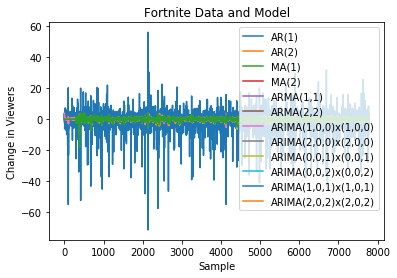

In [203]:
plt.plot(fit_list)
for key in gen_list:
    plt.plot(gen_list[key])
    
plt.legend(gen_list.keys())
plt.xlabel("Sample")
plt.ylabel("Change in Viewers")
plt.title("Fortnite Data and Model")
plt.savefig("Fortnite_D&M.jpg", dpi=200, bbox_inches='tight')


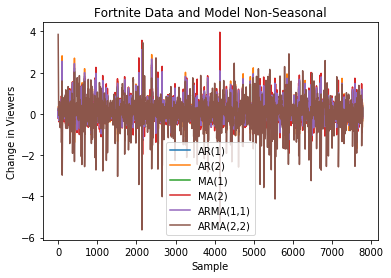

In [204]:
#plt.plot(fit_list)
for num, key in zip(range(len(gen_list)), gen_list):
    if num == 6:
        break
    plt.plot(gen_list[key])
    
plt.legend(gen_list.keys())
plt.xlabel("Sample")
plt.ylabel("Change in Viewers")
plt.title("Fortnite Data and Model Non-Seasonal")
plt.savefig("Fortnite_D&MNS.jpg", dpi=200, bbox_inches='tight')


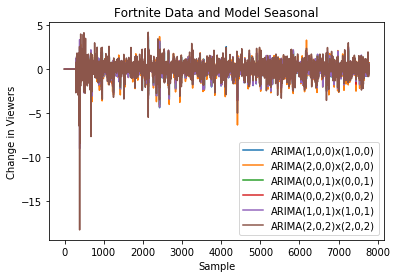

In [209]:
#plt.plot(fit_list)
leg = []
for num, key in zip(range(len(gen_list)), gen_list):
    if num >= 6:
        plt.plot(gen_list[key])
        leg = leg + [key]
    
plt.legend(leg)
plt.xlabel("Sample")
plt.ylabel("Change in Viewers")
plt.title("Fortnite Data and Model Seasonal")
plt.savefig("Fortnite_D&MS.jpg", dpi=200, bbox_inches='tight')


In [184]:
test_data1 = pd.read_excel("Fortnite_ret_test1.xlsx")
test_list1 = list(test_data1[test_data1.columns[0]])

print("Moments for Test Data 1")
amom1 = np.mean(fit_list)
amom2 = ACF(array(fit_list),0)
amom3 = skewness(array(fit_list))
amom4 = kurtosis(array(fit_list))
sig = np.sqrt(amom2)
print("Expected Value: " + str(amom1))
print("Variance: " + str(amom2))
print("Skewness: " + str(amom3))
print("Kurtosis: " + str(amom4))

Moments for Test Data 1
Expected Value: -0.02782017103909464
Variance: 25.838100438778355
Skewness: -3.3168059466824147
Kurtosis: 31.35494439402548


In [187]:
gen_list = {}
gen_list["AR(1)"] = test_AR(modelAR1_args, (test_list1))/len(test_list1)
gen_list["AR(2)"] = test_AR(modelAR2_args, (test_list1))/len(test_list1)
gen_list["MA(1)"] = test_MA(modelMA1_args, (test_list1))/len(test_list1)
gen_list["MA(2)"] = test_MA(modelMA2_args, (test_list1))/len(test_list1)
gen_list["ARMA(1,1)"] = test_ARMA(model11_args, (test_list1))/len(test_list1)
gen_list["ARMA(2,2)"] = test_ARMA(model22_args, (test_list1))/len(test_list1)
gen_list["ARIMA(1,0,0)x(1,0,0)"] = test_AR_S11(modelAR11_args, (test_list1))/len(test_list1)
gen_list["ARIMA(2,0,0)x(2,0,0)"] = test_AR_S22(modelAR22_args, (test_list1))/len(test_list1)
gen_list["ARIMA(0,0,1)x(0,0,1)"] = test_MA_S11(modelMA11_args, (test_list1))/len(test_list1)
gen_list["ARIMA(0,0,2)x(0,0,2)"] = test_MA_S22(modelMA22_args, (test_list1))/len(test_list1)
gen_list["ARIMA(1,0,1)x(1,0,1)"] = test_ARMA_S1111(modelARMA1111_args, (test_list1))/len(test_list1)
gen_list["ARIMA(2,0,2)x(2,0,2)"] = test_ARMA_S2222(modelARMA2222_args, (test_list1))/len(test_list1)

gen_list

{'AR(1)': 33.36649302107807,
 'AR(2)': 33.38021178542221,
 'MA(1)': 33.369254858703854,
 'MA(2)': 33.409579820240616,
 'ARMA(1,1)': 33.36720211443993,
 'ARMA(2,2)': 33.16561671869367,
 'ARIMA(1,0,0)x(1,0,0)': 30.204969701234173,
 'ARIMA(2,0,0)x(2,0,0)': 30.170224356065454,
 'ARIMA(0,0,1)x(0,0,1)': 30.1743860870063,
 'ARIMA(0,0,2)x(0,0,2)': 30.204551338747287,
 'ARIMA(1,0,1)x(1,0,1)': 30.29073429410795,
 'ARIMA(2,0,2)x(2,0,2)': 30.20557445321783}

In [188]:
test_data2 = pd.read_excel("Fortnite_ret_test2.xlsx")
test_list2 = list(test_data2[test_data2.columns[0]])

print("Moments for Test Data 2")
amom1 = np.mean(fit_list)
amom2 = ACF(array(fit_list),0)
amom3 = skewness(array(fit_list))
amom4 = kurtosis(array(fit_list))
sig = np.sqrt(amom2)
print("Expected Value: " + str(amom1))
print("Variance: " + str(amom2))
print("Skewness: " + str(amom3))
print("Kurtosis: " + str(amom4))

Moments for Test Data 2
Expected Value: -0.02782017103909464
Variance: 25.838100438778355
Skewness: -3.3168059466824147
Kurtosis: 31.35494439402548


In [189]:
gen_list = {}
gen_list["AR(1)"] = test_AR(modelAR1_args, (test_list2))/len(test_list2)
gen_list["AR(2)"] = test_AR(modelAR2_args, (test_list2))/len(test_list2)
gen_list["MA(1)"] = test_MA(modelMA1_args, (test_list2))/len(test_list2)
gen_list["MA(2)"] = test_MA(modelMA2_args, (test_list2))/len(test_list2)
gen_list["ARMA(1,1)"] = test_ARMA(model11_args, (test_list2))/len(test_list2)
gen_list["ARMA(2,2)"] = test_ARMA(model22_args, (test_list2))/len(test_list2)
gen_list["ARIMA(1,0,0)x(1,0,0)"] = test_AR_S11(modelAR11_args, (test_list2))/len(test_list2)
gen_list["ARIMA(2,0,0)x(2,0,0)"] = test_AR_S22(modelAR22_args, (test_list2))/len(test_list2)
gen_list["ARIMA(0,0,1)x(0,0,1)"] = test_MA_S11(modelMA11_args, (test_list2))/len(test_list2)
gen_list["ARIMA(0,0,2)x(0,0,2)"] = test_MA_S22(modelMA22_args, (test_list2))/len(test_list2)
gen_list["ARIMA(1,0,1)x(1,0,1)"] = test_ARMA_S1111(modelARMA1111_args, (test_list2))/len(test_list2)
gen_list["ARIMA(2,0,2)x(2,0,2)"] = test_ARMA_S2222(modelARMA2222_args, (test_list2))/len(test_list2)

gen_list

{'AR(1)': 38.935606723790414,
 'AR(2)': 38.84631949917472,
 'MA(1)': 38.961538560684836,
 'MA(2)': 39.05637793209027,
 'ARMA(1,1)': 38.900309242156304,
 'ARMA(2,2)': 38.60497857839041,
 'ARIMA(1,0,0)x(1,0,0)': 34.57182545461288,
 'ARIMA(2,0,0)x(2,0,0)': 34.47420760501583,
 'ARIMA(0,0,1)x(0,0,1)': 34.555178705460285,
 'ARIMA(0,0,2)x(0,0,2)': 34.92506351914975,
 'ARIMA(1,0,1)x(1,0,1)': 34.670123924150836,
 'ARIMA(2,0,2)x(2,0,2)': 34.68031465090809}